In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [33]:
inc=pd.read_csv('/content/income (1).csv')
inc.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


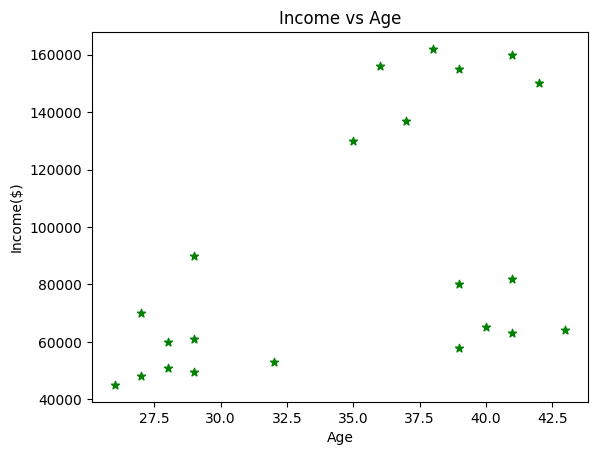

In [34]:
plt.xlabel('Age'),
plt.ylabel('Income($)'),
plt.title('Income vs Age')
plt.scatter(inc['Age'],inc['Income($)'],color='green',marker='*')

In [35]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(inc[['Age','Income($)']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [36]:
inc['cluster']=y_predicted
inc.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


In [37]:
inc1=inc[inc.cluster==0]
inc2=inc[inc.cluster==1]
inc3=inc[inc.cluster==2]

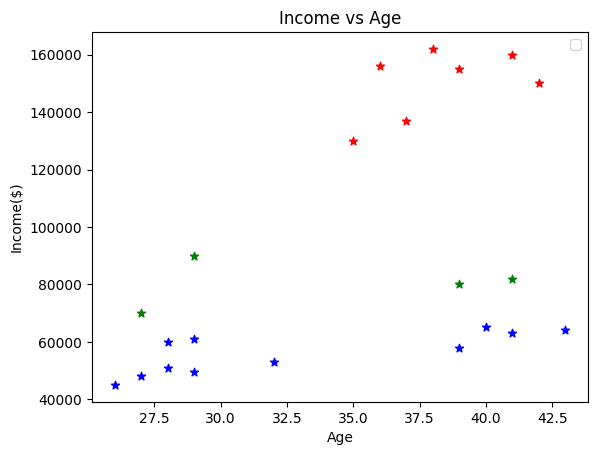

In [38]:
plt.scatter(inc1.Age,inc1['Income($)'],color='green',marker='*')
plt.scatter(inc2.Age,inc2['Income($)'],color='red',marker='*')
plt.scatter(inc3.Age,inc3['Income($)'],color='blue',marker='*')
plt.xlabel('Age'),
plt.ylabel('Income($)'),
plt.title('Income vs Age')
plt.legend()

#Preprocessing using min max scaler

In [39]:
scaler=MinMaxScaler()

In [40]:
scaler = MinMaxScaler()

scaler.fit(inc[['Income($)']])
inc['Income($)'] = scaler.transform(inc[['Income($)']])

scaler.fit(inc[['Age']])
inc['Age'] = scaler.transform(inc[['Age']])
inc.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


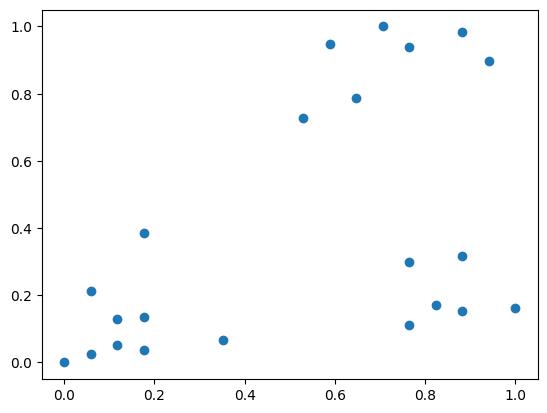

In [41]:
plt.scatter(inc.Age,inc['Income($)'])

In [43]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(inc[['Age','Income($)']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [47]:
inc['cluster']=y_predicted
inc.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


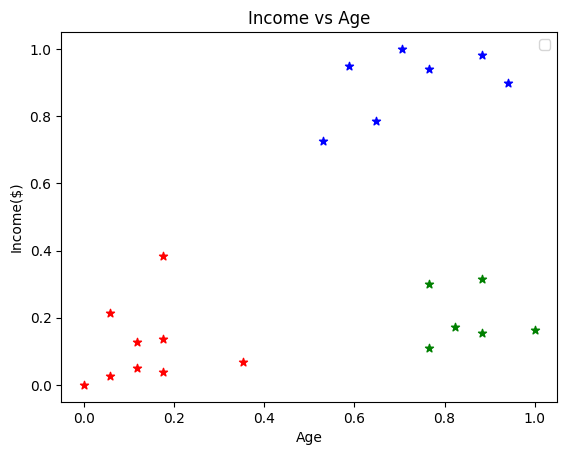

In [49]:
inc1=inc[inc.cluster==0]
inc2=inc[inc.cluster==1]
inc3=inc[inc.cluster==2]
plt.scatter(inc1.Age,inc1['Income($)'],color='green',marker='*')
plt.scatter(inc2.Age,inc2['Income($)'],color='red',marker='*')
plt.scatter(inc3.Age,inc3['Income($)'],color='blue',marker='*')
plt.xlabel('Age'),
plt.ylabel('Income($)'),
plt.title('Income vs Age')
plt.legend()

#centroids

In [50]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

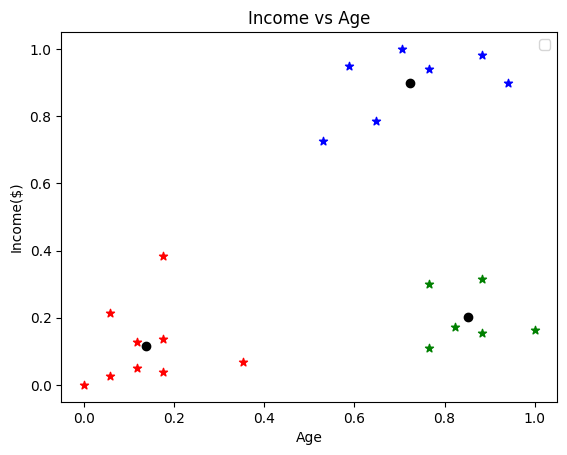

In [51]:
inc1=inc[inc.cluster==0]
inc2=inc[inc.cluster==1]
inc3=inc[inc.cluster==2]
plt.scatter(inc1.Age,inc1['Income($)'],color='green',marker='*')
plt.scatter(inc2.Age,inc2['Income($)'],color='red',marker='*')
plt.scatter(inc3.Age,inc3['Income($)'],color='blue',marker='*')
plt.xlabel('Age'),
plt.ylabel('Income($)'),
plt.title('Income vs Age')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black')
plt.legend()

#Elbow Plot

In [53]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(inc[['Age','Income($)']])
    sse.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

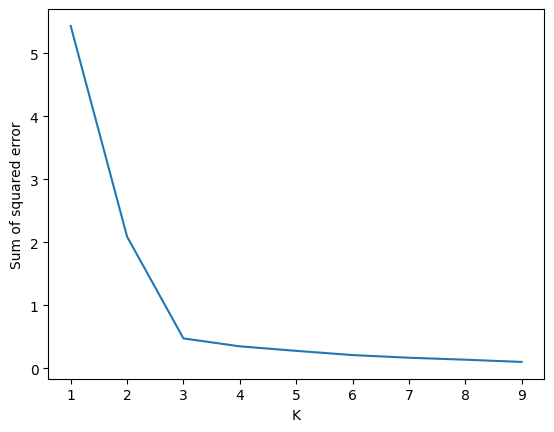

In [54]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)